<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da15_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 데이터 파일들이 저장된 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'
ratings_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
users_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/users.dat'

각 파일을 읽고 데이터프레임 3개를 생성.

In [3]:
# 데이터 프레임의 컬럼 이름들
movies_col = ['movie_id', 'title', 'genres']
ratings_col = ['user_id', 'movie_id', 'rating', 'timestamp']
users_col = ['user_id', 'gender', 'age', 'occupation', 'zip_code']

In [4]:
movies = pd.read_csv(movies_file, sep='::', engine='python',
                     encoding='cp1252',
                     names=movies_col)

In [5]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings = pd.read_csv(ratings_file, sep='::', engine='python', names=ratings_col)

In [7]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
users = pd.read_csv(users_file, sep='::', engine='python', names=users_col)

In [9]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB



* ratings와 movies 데이터프레임을 합침(merge).
* 위 결과에 users 데이터프레임을 합침(merge).


In [13]:
df = pd.merge(ratings, movies, how='inner', on='movie_id')

In [14]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1000209 non-null  int64 
 1   movie_id   1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  int64 
 4   title      1000209 non-null  object
 5   genres     1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [16]:
df = pd.merge(df, users, how='inner', on='user_id')

In [17]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zip_code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [19]:
pd.merge(left=pd.merge(ratings, movies),
         right=users)

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


데이터 프레임 탐색

In [20]:
# 숫자 타입 변수의 기술 통계량
df.describe()

,user_id,movie_id,rating,timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [21]:
# 다른 이름의 영화 제목 개수 - movies에는 ratings에 없는 영화들(사용자 평점이 없는 영화들)이 있었다.
len(df['title'].unique())

3706

In [22]:
# 영화 평점의 개수(빈도수)
rating_counts = df['rating'].value_counts()
rating_counts

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

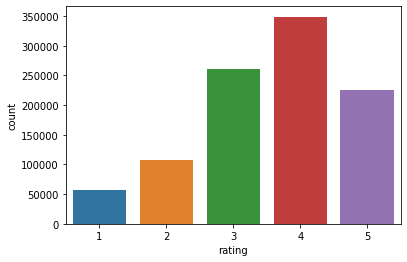

In [23]:
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [24]:
# 연령대 빈도수
age_counts = df['age'].value_counts()
age_counts

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: age, dtype: int64

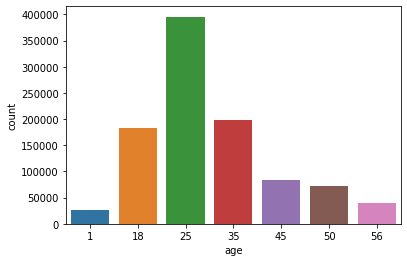

In [25]:
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [26]:
# 사용자 성비
gender_counts = df['gender'].value_counts()
gender_counts

M    753769
F    246440
Name: gender, dtype: int64

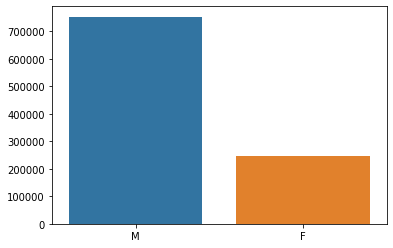

In [27]:
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.show()

In [28]:
# 직업코드(occupation) 빈도수
occ_counts = df['occupation'].value_counts()
occ_counts

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: occupation, dtype: int64

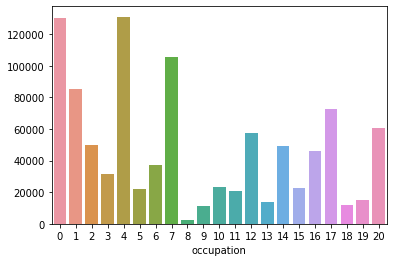

In [29]:
sns.barplot(x=occ_counts.index, y=occ_counts.values)
plt.xlabel('occupation')
plt.show()

영화 평점(rating)의 평균 상위 10개 영화 제목

In [30]:
# 영화 제목별 평점의 평균
by_title = df.groupby('title')['rating'].mean()

In [31]:
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [32]:
# 제목별 평점 평균 내림차순 정렬 -> 상위 10개
by_title.sort_values(ascending=False).head(n=10)

title
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
Ulysses (Ulisse) (1954)                      5.0
Smashing Time (1967)                         5.0
Follow the Bitch (1998)                      5.0
Song of Freedom (1936)                       5.0
Bittersweet Motel (2000)                     5.0
Baby, The (1973)                             5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: rating, dtype: float64

In [33]:
# 영화 제목 빈도수, 평점 평균
df.groupby('title')['rating'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
title,,
Ulysses (Ulisse) (1954),1,5.0
Lured (1947),1,5.0
Follow the Bitch (1998),1,5.0
Bittersweet Motel (2000),1,5.0
Song of Freedom (1936),1,5.0
...,...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1,1.0
Cheetah (1989),1,1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),2,1.0


리뷰 건수가 1개 또는 2개 밖에 없는 영화들의 평점 평균을 계산하는 것은 큰 의미가 없을 것 같다. 일정 숫자 이상의 리뷰 건수가 있는 영화들만 선택해서 평점 분석을 하는 것이 더 의미가 있을 것 같다.

In [36]:
# 영화 제목별 리뷰 건수
# title_counts = df.groupby('title').size()
title_counts = df['title'].value_counts()
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
McCullochs, The (1975)                                      1
Schlafes Bruder (Brother of Sleep) (1995)                   1
Bat Whispers, The (1930)                                    1
Scorta, La (1993)                                           1
Loves of Carmen, The (1948)                                 1
Name: title, Length: 3706, dtype: int64

In [37]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

In [40]:
# 150건 이상의 리뷰를 받은 영화 제목
indexer = title_counts[title_counts >= 150].index

In [41]:
len(indexer)  # 150건 이상의 리뷰를 받은 영화는 1,683개

1683

In [42]:
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Dead Man (1995)', 'Twelfth Night (1996)', 'Cowboy Way, The (1994)',
       'Program, The (1993)',
       'Tales from the Crypt Presents: Bordello of Blood (1996)',
       'Asphalt Jungle, The (1950)', 'Golden Voyage of Sinbad, The (1974)',
       'In the Army Now (1994)', 'Love and Death on Long Island (1997)',
       'Police Academy 5: Assignment: Miami Beach (1988)'],
      dtype='object', length=1683)

In [50]:
# 150건 이상의 리뷰를 받은 영화들의 평점 평균
by_title_150 = by_title.loc[indexer]

In [51]:
by_title_150

American Beauty (1999)                                   4.317386
Star Wars: Episode IV - A New Hope (1977)                4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Star Wars: Episode VI - Return of the Jedi (1983)        4.022893
Jurassic Park (1993)                                     3.763847
                                                           ...   
Asphalt Jungle, The (1950)                               3.927152
Golden Voyage of Sinbad, The (1974)                      3.397351
In the Army Now (1994)                                   2.225166
Love and Death on Long Island (1997)                     3.430464
Police Academy 5: Assignment: Miami Beach (1988)         1.766667
Name: rating, Length: 1683, dtype: float64

In [52]:
# 150건 이상의 리뷰를 받은 영화들 중 평점 평균 상위 10개
by_title_150.sort_values(ascending=False).head(n=10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [53]:
# 150건 이상의 리뷰를 받은 영화들 중 평점 평균 하위 10개
by_title_150.sort_values().head(n=10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

In [57]:
# 150건 이상의 리뷰를 받은 영화들에서 성별 영화 평점 평균
df.groupby(['title', 'gender'])['rating'].mean().unstack()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [59]:
by_gender = df.pivot_table(values='rating', index='title', columns='gender')

In [60]:
by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [61]:
by_gender_150 = by_gender.loc[indexer]

In [62]:
by_gender_150

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818
In the Army Now (1994),2.384615,2.192000
Love and Death on Long Island (1997),3.116279,3.555556


In [63]:
# 여성 평점 상위 10개 영화
by_gender_150.sort_values(by='F', ascending=False).head(n=10)

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [64]:
# 남성 평점 상위 10개 영화
by_gender_150.sort_values(by='M', ascending=False).head(n=10)

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [65]:
# 남성 평점 평균과 여성 평점 평균의 차이(diff)를 파생 변수로 추가
by_gender_150['diff'] = by_gender_150['M'] - by_gender_150['F']

In [66]:
by_gender_150

gender,F,M,diff
American Beauty (1999),4.238901,4.347301,0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,0.203821
Jurassic Park (1993),3.579407,3.814197,0.234791
...,...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130,0.436702
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818,0.273923
In the Army Now (1994),2.384615,2.192000,-0.192615
Love and Death on Long Island (1997),3.116279,3.555556,0.439276


남녀 평점의 차이가 큰 영화 - 남녀 선호도가 차이나는 영화

* 여성 평점 평균이 높은 경우
* 남성 평점 평균이 높은 경우


In [68]:
# 150건 이상의 리뷰를 받은 영화들 중에서 여성들의 평점이 남성에 비해서 높은 영화 상위 10개
# ascending=True 생략 -> 오름차순 정렬 ->  작은 숫자부터 큰 숫자 순으로 정렬
by_gender_150.sort_values(by='diff').head(n=10)

gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,-0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
Grease (1978),3.975265,3.367041,-0.608224
Police Academy 4: Citizens on Patrol (1987),2.406250,1.802817,-0.603433
Brokedown Palace (1999),3.312500,2.723577,-0.588923
"Relic, The (1997)",3.309524,2.723077,-0.586447
Angels in the Outfield (1994),3.162500,2.580838,-0.581662


In [69]:
# 150건 이상의 리뷰를 받은 영화들 중에서 남성들의 평점이 여성에 비해서 높은 영화 상위 10개
# 내림차순 정렬 -> 큰 숫자부터 작은 숫자 순서로 정렬
by_gender_150.sort_values(by='diff', ascending=False).head(n=10)

gender,F,M,diff
Lifeforce (1985),2.250000,2.994152,0.744152
Quest for Fire (1981),2.578947,3.309677,0.730730
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Tora! Tora! Tora! (1970),3.090909,3.737705,0.646796
Up in Smoke (1978),2.944444,3.585227,0.640783
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Friday the 13th: The Final Chapter (1984),1.636364,2.258503,0.622140
"Longest Day, The (1962)",3.411765,4.031447,0.619682


성별과 상관없이, 영화의 선호도 차이가 큰 영화들 - 평점 표준편차

In [71]:
# 영화 제목별 평점 평균, 표준편차
by_title = df.groupby('title')['rating'].agg(['mean', 'std'])

In [72]:
by_title

,mean,std
title,,
"$1,000,000 Duck (1971)",3.027027,1.092563
'Night Mother (1986),3.371429,1.118636
'Til There Was You (1997),2.692308,1.020159
"'burbs, The (1989)",2.910891,1.107760
...And Justice for All (1979),3.713568,0.878110
...,...,...
"Zed & Two Noughts, A (1985)",3.413793,1.052794
Zero Effect (1998),3.750831,1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000,0.707107


In [73]:
# 150건 이상의 리뷰를 받은 영화들만 선택
by_title_150 = by_title.loc[indexer]

In [74]:
by_title_150

,mean,std
American Beauty (1999),4.317386,0.975133
Star Wars: Episode IV - A New Hope (1977),4.453694,0.800781
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,0.844432
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,0.927356
Jurassic Park (1993),3.763847,0.969777
...,...,...
"Asphalt Jungle, The (1950)",3.927152,0.833461
"Golden Voyage of Sinbad, The (1974)",3.397351,0.879996
In the Army Now (1994),2.225166,1.020929
Love and Death on Long Island (1997),3.430464,0.969604


In [76]:
# 표준편차 내림차순 정렬
by_title_150.sort_values(by='std', ascending=False).head(n=10)

,mean,std
Plan 9 from Outer Space (1958),2.634538,1.455998
"Texas Chainsaw Massacre, The (1974)",3.222672,1.332448
Dumb & Dumber (1994),3.192424,1.321333
"Blair Witch Project, The (1999)",3.031528,1.316368
Natural Born Killers (1994),3.144286,1.307198
Idle Hands (1999),2.724638,1.298439
Pink Flamingos (1972),3.240506,1.293937
"Transformers: The Movie, The (1986)",3.380952,1.292917
Very Bad Things (1998),2.774194,1.280074
Tank Girl (1995),2.614525,1.277695


In [80]:
# 선호도 차이가 적은 영화 - 평점 평균 표준편차가 작은 영화
by_title_150.sort_values(by='std').head(n=10)

,mean,std
"Close Shave, A (1995)",4.520548,0.667143
Rear Window (1954),4.476190,0.688946
"Great Escape, The (1963)",4.376437,0.692585
"Shawshank Redemption, The (1994)",4.554558,0.700443
"Wrong Trousers, The (1993)",4.507937,0.708666
Central Station (Central do Brasil) (1998),4.283721,0.709393
Never Cry Wolf (1983),3.981132,0.721782
"Soldier's Story, A (1984)",3.737805,0.725206
Raiders of the Lost Ark (1981),4.477725,0.725647
Seven Days in May (1964),4.254545,0.729639


* 150건 이상 리뷰를 받은 영화들 중에서, 평점 평균 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개

In [ ]:
by_title_150[by_title_150['mean'] >= 4.0]

* 150건 이상 리뷰를 받은 영화들 중에서, 여성 평점 평균 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개

* 150건 이상 리뷰를 받은 영화들 중에서, 남성 평점 평균 4.0 이상인 영화들에서 자주 등장하는 영화 장르 상위 10개